In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [116]:
dataset_path = "./dataset/zalando-hd-resized/train/cloth/"

img_list = []
for img in os.listdir(dataset_path):
    img_list.append(img)

print(img_list)

['00000_00.jpg', '00001_00.jpg', '00002_00.jpg', '00003_00.jpg', '00005_00.jpg', '00007_00.jpg', '00009_00.jpg', '00010_00.jpg', '00011_00.jpg', '00012_00.jpg', '00014_00.jpg', '00015_00.jpg', '00016_00.jpg', '00018_00.jpg', '00019_00.jpg', '00022_00.jpg', '00023_00.jpg', '00024_00.jpg', '00025_00.jpg', '00026_00.jpg', '00028_00.jpg', '00029_00.jpg', '00030_00.jpg', '00031_00.jpg', '00032_00.jpg', '00033_00.jpg', '00036_00.jpg', '00038_00.jpg', '00040_00.jpg', '00041_00.jpg', '00042_00.jpg', '00043_00.jpg', '00044_00.jpg', '00045_00.jpg', '00046_00.jpg', '00047_00.jpg', '00048_00.jpg', '00049_00.jpg', '00050_00.jpg', '00051_00.jpg', '00052_00.jpg', '00053_00.jpg', '00054_00.jpg', '00056_00.jpg', '00058_00.jpg', '00059_00.jpg', '00061_00.jpg', '00062_00.jpg', '00065_00.jpg', '00066_00.jpg', '00068_00.jpg', '00070_00.jpg', '00072_00.jpg', '00073_00.jpg', '00076_00.jpg', '00077_00.jpg', '00078_00.jpg', '00079_00.jpg', '00080_00.jpg', '00081_00.jpg', '00082_00.jpg', '00083_00.jpg', '00085_

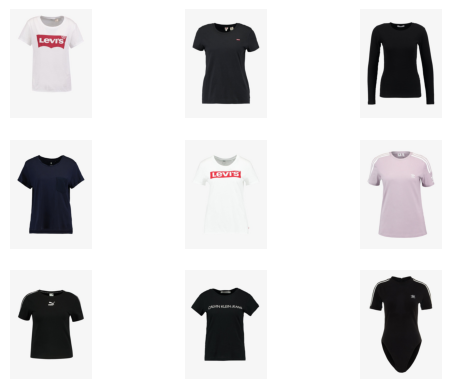

In [117]:
for i in range(3):
    for j in range(3):
        img = plt.imread(dataset_path + img_list[i*3+j])
        plt.subplot(3, 3, i*3+j+1)
        plt.axis('off')
        plt.imshow(img)

In [118]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class CustomImageDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.images = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.directory, self.images[idx])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = CustomImageDataset(directory=dataset_path, transform=transform)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

In [119]:
import torch
from torchvision.models import resnet50

# Initialize the pre-trained model
model = resnet50(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Adapt the model to use it as a feature extractor
model = torch.nn.Sequential(*(list(model.children())[:-1]))

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
model = model.to(device)

# Feature extraction function
def extract_features(dataloader, model, device):
    features = []
    with torch.no_grad():
        for inputs in dataloader:
            inputs = inputs.to(device)  # Move input data to the GPU
            outputs = model(inputs).flatten(start_dim=1)
            features.append(outputs.cpu().numpy())  # Move the tensors back to CPU for numpy conversion
    return np.concatenate(features, axis=0)

# Extract features
features = extract_features(dataloader, model, device)

In [ ]:
#save model
np.save('./features.npy', features)

In [120]:
from sklearn.cluster import KMeans

# Clustering
kmeans = KMeans(n_clusters=40, random_state=22)
clusters = kmeans.fit_predict(features)

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [121]:
print(len(clusters))
print(clusters)

11647
[ 8 11 29 ... 34  2  9]


In [122]:
cluster_groups = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
for i, cluster in enumerate(clusters):
    if cluster not in cluster_groups:
        cluster_groups[cluster] = []
    cluster_groups[cluster].append(img_list[i])

In [123]:
print(cluster_groups.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 29, 10, 27, 25, 14, 21, 39, 34, 16, 17, 37, 20, 31, 22, 15, 30, 19, 13, 23, 33, 28, 38, 36, 18, 12, 32, 35, 24, 26])


In [124]:
def print_cluster_img(num):
    for i in range(10):
        img = plt.imread(dataset_path + cluster_groups[num][i])
        plt.subplot(2, 5, i+1)
        plt.axis('off')
        plt.imshow(img)

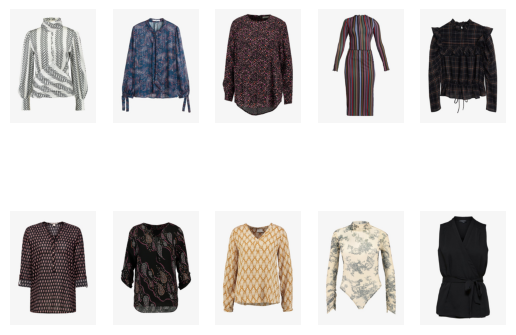

In [125]:
print_cluster_img(0)

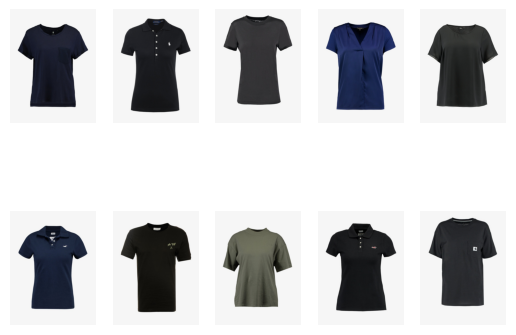

In [126]:
print_cluster_img(1)

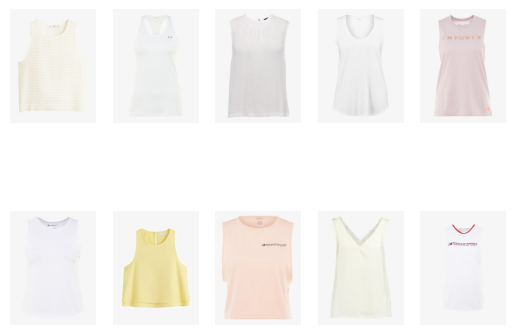

In [127]:
print_cluster_img(2)

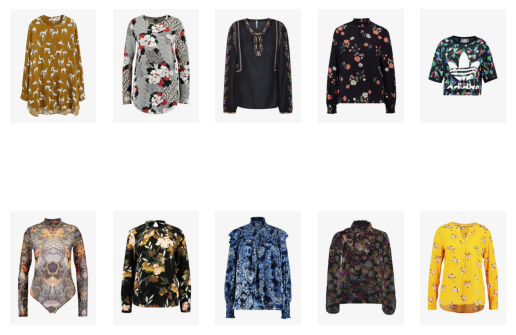

In [128]:
print_cluster_img(3)

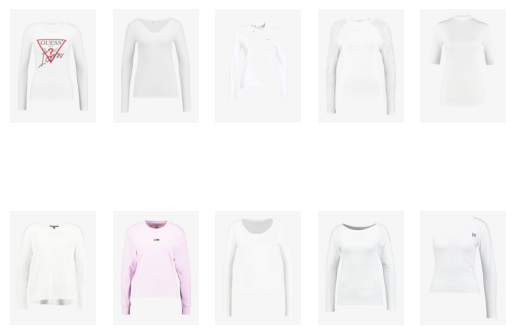

In [129]:
print_cluster_img(4)

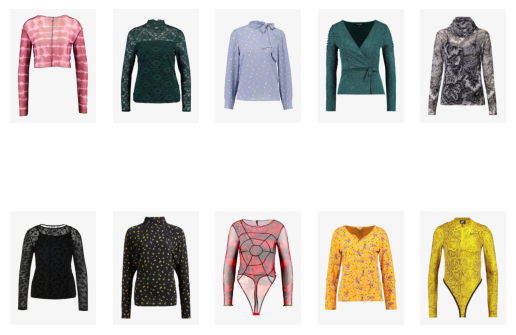

In [130]:
print_cluster_img(5)

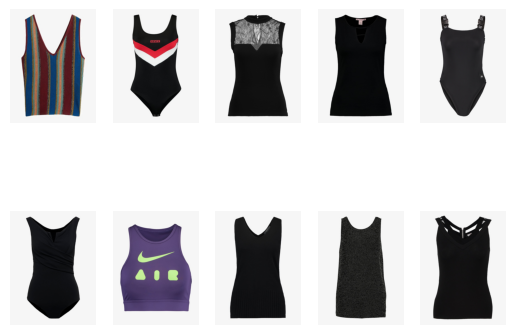

In [131]:
print_cluster_img(6)

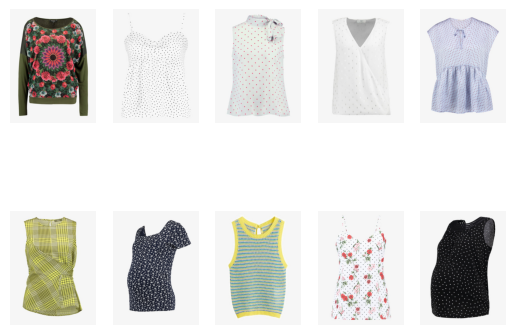

In [132]:
print_cluster_img(7)

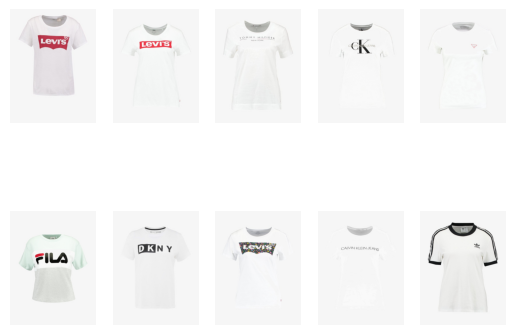

In [133]:
print_cluster_img(8)

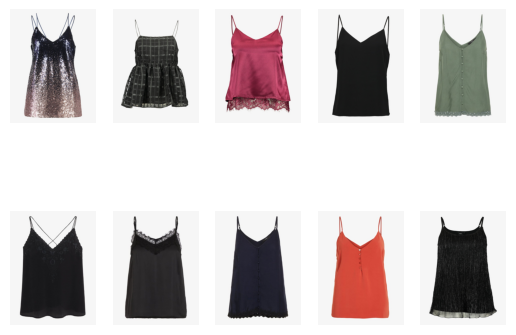

In [134]:
print_cluster_img(9)